In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

# Load the CSV file
file_path = r"./Luis Data/bands_SHU_chi_0.37_eps_11p56_N10000/output.csv"  

In [28]:
freqs = []
k_points = []
with open(file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        freqs.append(row[5:-1])
        k_points.append(row[0])


In [29]:
freqs = np.array(freqs[1:],dtype=float)
k_points= np.array(k_points[1:],dtype=float)
print(k_points.shape,freqs.shape)

(79,) (79, 599)


In [30]:
def get_gaps(list_freqs):
    flattened_lambdas = np.sort(np.concatenate(list_freqs))
    bands = []
    gaps_list = np.diff(flattened_lambdas)
    for i,gaps in enumerate(gaps_list):
        if gaps>0.05:
            # max_gap_index = np.argmax(gaps)
            bandgap_lower = flattened_lambdas[i]
            bandgap_upper = flattened_lambdas[i + 1]
            gap_width = (bandgap_upper-bandgap_lower)/((bandgap_upper+bandgap_lower)/2)
            bands.append([bandgap_lower,bandgap_upper,gap_width])
    return bands

In [44]:
a_mpb = 14.071248100000000 # in microns, size of the unit cell in MPB
C_MPB = 29979245800  # in microns/speed of light in MPB units

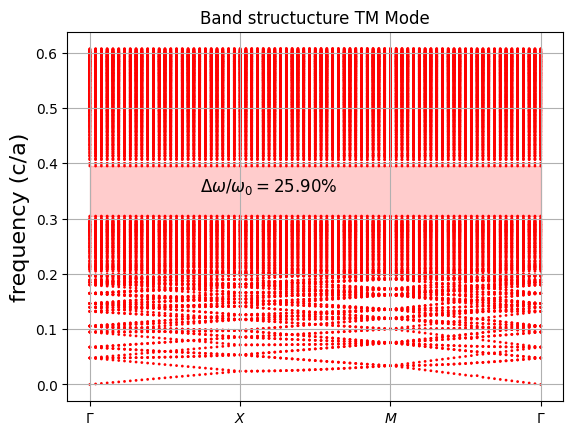

In [64]:
for item in freqs.T:
    plt.scatter(k_points,item, color="red",facecolors='none',s=1)

plt.ylabel('frequency (c/a)', size=16)
points_in_between = 25
tick_locs = [i*points_in_between+i+1 for i in range(4)]
tick_labs = [r'$\Gamma$', r'$X$', r'$M$', r'$\Gamma$']
gap = get_gaps(freqs)
for item in gap:
    plt.fill_between(k_points,item[0],item[1], color='red', alpha=0.2)
    plt.text(k_points[int(len(k_points)/4)],((item[0]+item[1])/2), rf'$\Delta \omega / \omega_0 = {item[2]*100 :.2f}$%', fontsize = 12)

plt.xticks(tick_locs)
plt.xticks(tick_locs, tick_labs)
plt.grid(True)
plt.title("Band structucture TM Mode")
plt.show()


In [65]:
item[0],item[1]

(0.304417, 0.394979)